# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objs as go
%matplotlib inline
sns.set()

# Data Processing And Cleaning

In [2]:
df=pd.read_csv('data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0            28.0          26.0       6.0        11.0   
1      95.0    28.0            31.0          23.0       7.0        11.0   
2      94.0    27.0            24.0          33.0       9.0         9.0   
3      68.0    15.0            21.0          13.0      90.0        85.0   
4      88.0    68.0            58.0          51.0      15.0        13.0   

   GKKicking GKPositioning GKReflexes Release Clause  
0       15.0          14.0        8.0        €226.5M  
1       15.0          14.0       11.0        €127.1M  
2       15.0          15.0       11.0        €228.1M  
3       87.0          88.0       94.0        €138.6M  
4        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

In [3]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [4]:
df.shape

(18207, 88)

In [5]:
x=df.isnull().sum()
x[x>0]

Club                         241
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
                            ... 
GKHandling                    48
GKKicking                     48
GKPositioning                 48
GKReflexes                    48
Release Clause              1564
Length: 76, dtype: int64

In [6]:
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [7]:
df.fillna(0, inplace = True)

In [8]:
x=df.isnull().sum()
x[x>0]

Series([], dtype: int64)

In [9]:
for i in range(len(df)):
    
    val=df['Value'][i]
    
    if('M' in val):
        val_=val[1:-1]
        val_=float(val_)
        df['Value'][i]=val_
        
    elif('K' in val):
        val_=val[1:-1]
        val_=float(val_)
        val_=val_/1000
        df['Value'][i]=val_
        
    elif(val=='€0'):
        val_=0
        df['Value'][i]=val_
        
df['Value']=df['Value'].astype(float)

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
for i in range(len(df)):
    
    val=df['Wage'][i]
    
        
    if('K' in val):
        val_=val[1:-1]
        val_=float(val_)
        df['Wage'][i]=val_
        
    elif(val=='€0'):
        val_=0
        df['Wage'][i]=val_
        
df['Wage']=df['Wage'].astype(float)

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
for i in range(len(df)):
    
    val=df['Release Clause'][i]
    
    if(val==0):
        
        continue
    
    if('M' in val):
        val_=val[1:-1]
        val_=float(val_)
        df['Release Clause'][i]=val_
        
    elif('K' in val):
        val_=val[1:-1]
        val_=float(val_)
        val_=val_/1000
        df['Release Clause'][i]=val_
        
    elif(val=='€0'):
        val_=0
        df['Release Clause'][i]=val_
        

        
df['Release Clause']=df['Release Clause'].astype(float)

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
for i in range(len(df)):
    x=df['Height'][i].split("'")
    
    if(len(x)==2):
        
        h_ft = float(x[0])
        h_inch = float(x[1])

        h_inch += h_ft * 12
        h_cm = round(h_inch * 2.54, 1)
        
        df['Height'][i]=h_cm
        
        
df['Height']=df['Height'].astype(float)

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
df['Weight']=df['Weight'].apply(lambda x:x[:-3])
df['Weight']=df['Weight'].astype(int)

In [14]:
for i in range(len(df)):
    x=df['Contract Valid Until'][i]
    x=str(x)
    x=x[-4:]
    df['Contract Valid Until'][i]=x

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# EDA

## Based on overall data

In [15]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

### Youngest And Oldest Players

In [16]:
df[['Name','Age','Nationality','Club']].sort_values(by='Age').reset_index().drop('index',axis=1)[:10]

Name  Age          Nationality             Club
0       G. Nugent   16              England  Tranmere Rovers
1       J. Olstad   16               Norway  Sarpsborg 08 FF
2     H. Massengo   16               France        AS Monaco
3     J. Italiano   16            Australia      Perth Glory
4        N. Ayéva   16               Sweden        Örebro SK
5        K. Broda   16               Poland     Wisła Kraków
6     L. D'Arrigo   16            Australia  Adelaide United
7  Y. Verschaeren   16              Belgium   RSC Anderlecht
8       B. Nygren   16               Sweden     IFK Göteborg
9     B. O'Gorman   16  Republic of Ireland   Bray Wanderers

In [17]:
df[['Name','Age','Nationality','Club']].sort_values(by='Age',ascending=False).reset_index().drop('index',axis=1)[:10]

Name  Age        Nationality                          Club
0       O. Pérez   45             Mexico                       Pachuca
1  K. Pilkington   44            England              Cambridge United
2      T. Warner   44  Trinidad & Tobago            Accrington Stanley
3    S. Narazaki   42              Japan                Nagoya Grampus
4       C. Muñoz   41          Argentina  CD Universidad de Concepción
5      J. Villar   41           Paraguay                       No Club
6   H. Sulaimani   41       Saudi Arabia                     Ohod Club
7       M. Tyler   41            England           Peterborough United
8       B. Nivet   41             France                  ESTAC Troyes
9       F. Kippe   40             Norway                 Lillestrøm SK

### Highest Rated Players

In [18]:
x=df[['Name','Overall','Nationality','Club']].sort_values(by='Overall',ascending=False).reset_index().drop('index',axis=1)[:20]
x

Name  Overall Nationality                 Club
0            L. Messi       94   Argentina         FC Barcelona
1   Cristiano Ronaldo       94    Portugal             Juventus
2           Neymar Jr       92      Brazil  Paris Saint-Germain
3              De Gea       91       Spain    Manchester United
4        K. De Bruyne       91     Belgium      Manchester City
5           E. Hazard       91     Belgium              Chelsea
6           L. Modrić       91     Croatia          Real Madrid
7           L. Suárez       91     Uruguay         FC Barcelona
8        Sergio Ramos       91       Spain          Real Madrid
9            D. Godín       90     Uruguay      Atlético Madrid
10        David Silva       90       Spain      Manchester City
11           J. Oblak       90    Slovenia      Atlético Madrid
12           T. Kroos       90     Germany          Real Madrid
13     R. Lewandowski       90      Poland    FC Bayern München
14    Sergio Busquets       89       Spain         FC Barcelona
15       G. Chiellini       89       Italy             Juventus
16          S. Agüero       89   Argentina      Manchester City
17           M. Neuer       89     Germany    FC Bayern München
18          E. Cavani       89     Uruguay  Paris Saint-Germain
19            H. Kane       89     England    Tottenham Hotspur

In [19]:
data=[
    go.Scatter(
    x=x['Name'],
    y=x['Overall'],
    mode='markers+lines'
    )
]

layout=go.Layout(
title='Highest Overall Player Rating',
xaxis=dict(title='Players'),
yaxis=dict(title='Rating'),
hovermode='closest'
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

### Players Rating vs Potential

In [20]:
x1=df[['Name','Overall','Nationality','Club','Potential']].sort_values(by='Overall',ascending=False).reset_index().drop('index',axis=1)[:20]
x1

Name  Overall Nationality                 Club  Potential
0            L. Messi       94   Argentina         FC Barcelona         94
1   Cristiano Ronaldo       94    Portugal             Juventus         94
2           Neymar Jr       92      Brazil  Paris Saint-Germain         93
3              De Gea       91       Spain    Manchester United         93
4        K. De Bruyne       91     Belgium      Manchester City         92
5           E. Hazard       91     Belgium              Chelsea         91
6           L. Modrić       91     Croatia          Real Madrid         91
7           L. Suárez       91     Uruguay         FC Barcelona         91
8        Sergio Ramos       91       Spain          Real Madrid         91
9            D. Godín       90     Uruguay      Atlético Madrid         90
10        David Silva       90       Spain      Manchester City         90
11           J. Oblak       90    Slovenia      Atlético Madrid         93
12           T. Kroos       90     Germany          Real Madrid         90
13     R. Lewandowski       90      Poland    FC Bayern München         90
14    Sergio Busquets       89       Spain         FC Barcelona         89
15       G. Chiellini       89       Italy             Juventus         89
16          S. Agüero       89   Argentina      Manchester City         89
17           M. Neuer       89     Germany    FC Bayern München         89
18          E. Cavani       89     Uruguay  Paris Saint-Germain         89
19            H. Kane       89     England    Tottenham Hotspur         91

In [21]:
trace0=go.Scatter(
    x=x1['Name'],
    y=x1['Overall'],
    mode='markers+lines',
    name='Overall Rating',
    marker=dict(size=14,color='rgb(0,100,0)',line=dict(width=2)))

trace1=go.Scatter(
    x=x1['Name'],
    y=x1['Potential'],
    mode='markers+lines',
    name='Potential Rating',
    marker=dict(size=14,color='rgb(100,0,0)',line=dict(width=2)))

data=[trace0,trace1]

layout=go.Layout(
title='Overall vs Potential',
xaxis=dict(title='Players'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Players with Highest Growth

In [22]:
df['Growth']=df['Potential']-df['Overall']
x=df.loc[:,['Name','Overall','Growth']].sort_values(by='Growth',ascending=False)[:20]

trace0=go.Bar(
    x=x['Name'],
    y=x['Overall'],
    text='Overall',
    name='Overall'
    )

trace1=go.Bar(
    x=x['Name'],
    y=x['Growth'],
    text='Growth',
    name='Growth',
    )

data=[trace0,trace1]

layout=go.Layout(
title='Which Foot Player have better skills and Weak Foot',barmode='stack',
xaxis=dict(title='Foot'),
yaxis=dict(title='Weak Foot Value/Skills Value'),
hovermode='closest')
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### How does Potential Changes Over Age

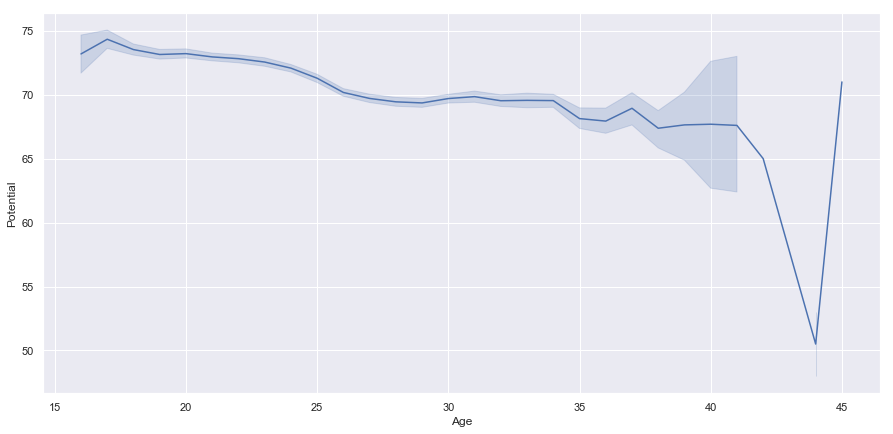

In [23]:
plt.figure(figsize=(15,7))
sns.lineplot(df['Age'],df['Potential'])

### Age Vs Rating

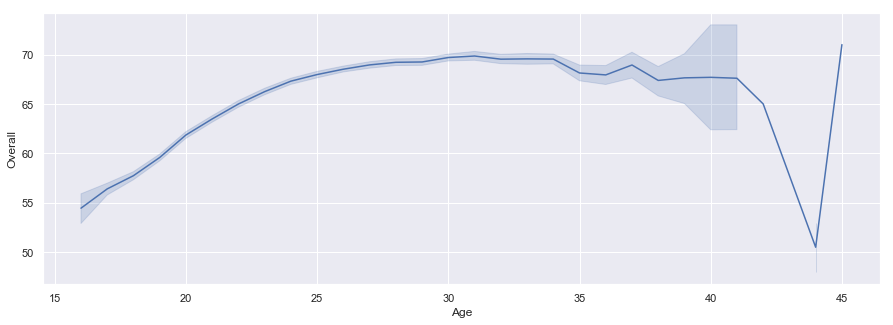

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(df['Age'],df['Overall'])

### Countries with Youngest and Oldest Talents

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

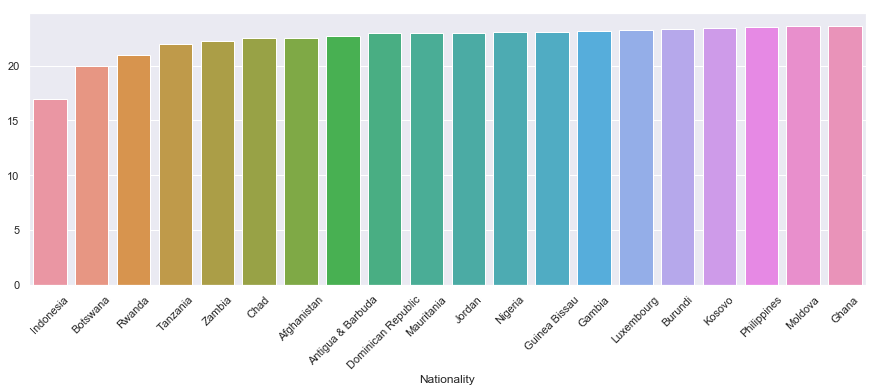

In [25]:
plt.figure(figsize=(15,5))
x=df.groupby('Nationality')['Age'].mean().sort_values()[:20]
sns.barplot(x.index,x.values)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

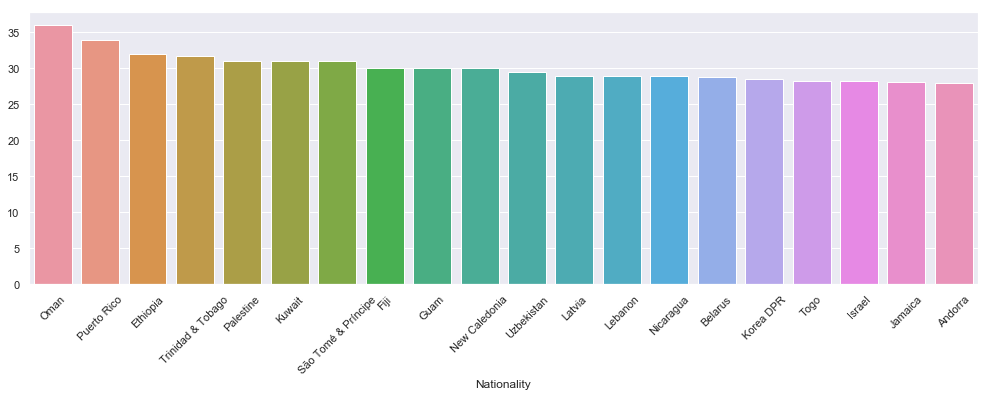

In [26]:
plt.figure(figsize=(17,5))
x=df.groupby('Nationality')['Age'].mean().sort_values(ascending=False)[:20]
sns.barplot(x.index,x.values)
plt.xticks(rotation=45)

### Clubs with Youngest and Oldest Talents

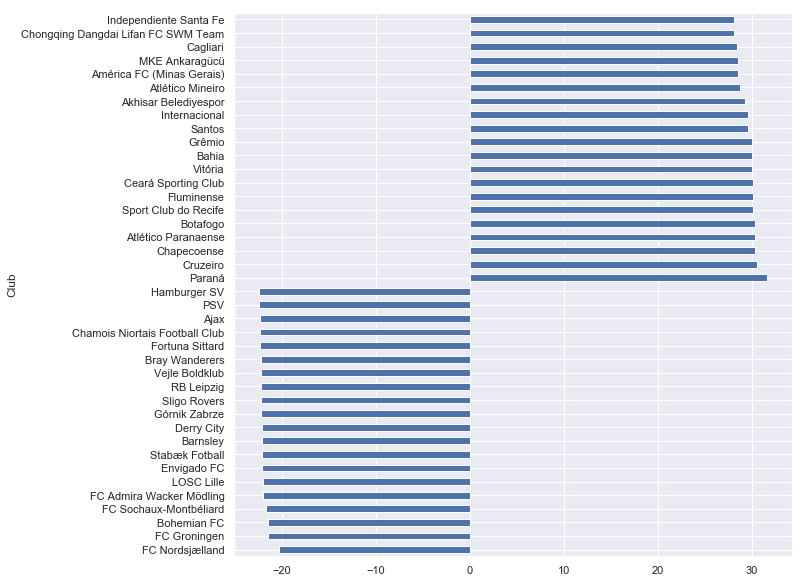

In [27]:
x=df.groupby('Club')['Age'].mean().sort_values()[:20]
x1=df.groupby('Club')['Age'].mean().sort_values(ascending=False)[:20]

for i in range(len(x)):
    x.values[i]=np.negative(x.values[i])

x=x.append(x1)
    
plt.figure(figsize=(10,10))
x.plot(kind='barh')

### Club wtih Most Valuable Players 

In [28]:
x=df.groupby('Club')['Value'].sum().sort_values(ascending=False)[:20]

data=[
    go.Scatter(
    x=x.index,
    y=x.values,
    mode='markers+lines'
    )
]

layout=go.Layout(
title='Club with Most Valuable Player',
xaxis=dict(title='Clubs'),
yaxis=dict(title='Value in Million'),
hovermode='closest'
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

### Clubs Offering Highest Wages

In [29]:
x=df.groupby('Club')['Wage'].sum().sort_values(ascending=False)[:20]

data=[
    go.Scatter(
    x=x.index,
    y=x.values,
    mode='markers+lines'
    )
]

layout=go.Layout(
title='Clubs Offering Highest Wages',
xaxis=dict(title='Clubs'),
yaxis=dict(title='Value in Million'),
hovermode='closest'
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

### Club With Best Players

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

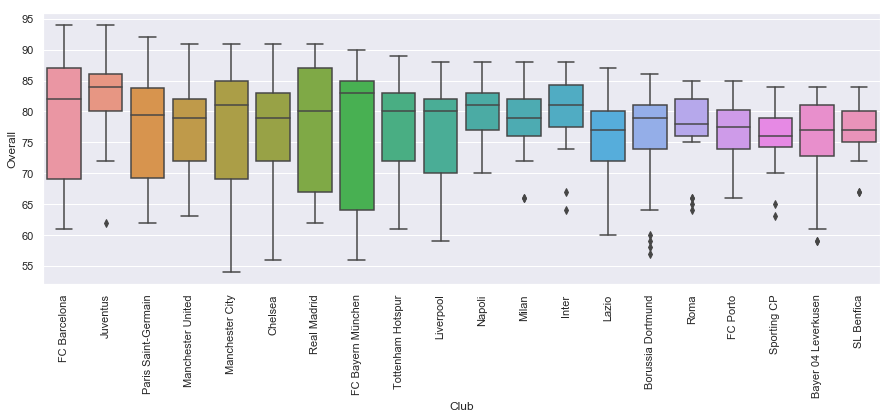

In [30]:
x=df.groupby('Club')['Overall'].mean().sort_values(ascending=False)[:20]
x1=list(x.index)
y=df[df['Club'].apply(lambda x:x in x1)][['Overall','Club']]

plt.figure(figsize=(15,5))
sns.boxplot(y['Club'],y['Overall'])
plt.xticks(rotation=90)

### Club with Most World Class Players (Above 85 Rating)

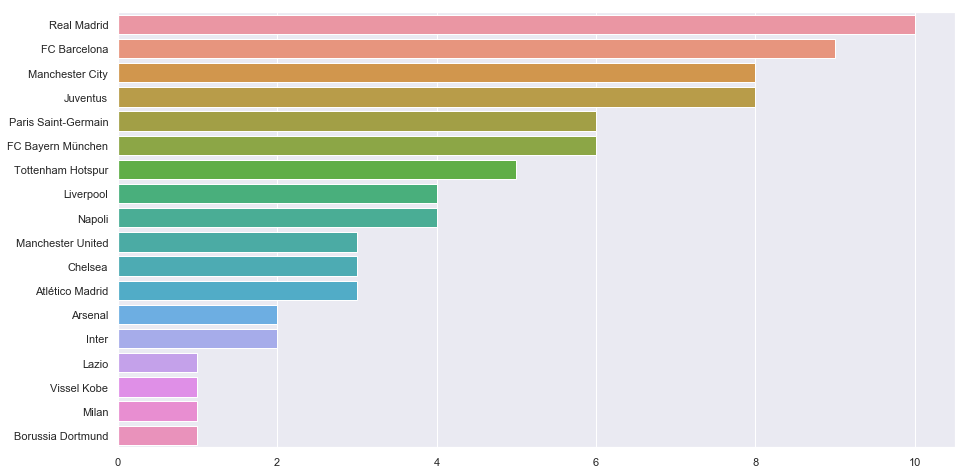

In [31]:
x=df[df['Overall']>85]['Club'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x.values,x.index)

### Most Preferred Foot

In [32]:
x=df['Preferred Foot'].value_counts()
data=[go.Pie(
        labels=list(x.index),
        values=list(x.values))]

layout=go.Layout(
title='Most Preferred Foot',
xaxis=dict(title='Foot'),
yaxis=dict(title='Count'),
hovermode='closest'
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

### Which Foot Player have better skills and Weak Foot

In [33]:
x=df.groupby('Preferred Foot')['Weak Foot','Skill Moves'].mean()
trace0=go.Bar(
    x=x.index,
    y=x['Weak Foot'],
    text='Weak Foot Value',
    name='Weak Foot Value',
    )

trace1=go.Bar(
    x=x.index,
    y=x['Skill Moves'],
    text='Skills Value',
    name='Skills Value',
    )

data=[trace0,trace1]

layout=go.Layout(
title='Which Foot Player have better skills and Weak Foot',barmode='stack',
xaxis=dict(title='Foot'),
yaxis=dict(title='Weak Foot Value/Skills Value'),
hovermode='closest')
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### How Players work rate affect their rating

In [34]:
x=df.groupby('Work Rate')[['Overall','Potential']].mean()

trace0=go.Scatter(
    x=x.index,
    y=x['Overall'],
    mode='markers+lines',
    name='Average Overall Rating',
    marker=dict(size=14,color='rgb(0,100,0)',line=dict(width=2)))

trace1=go.Scatter(
    x=x.index,
    y=x['Potential'],
    mode='markers+lines',
    name='average Potential Rating',
    marker=dict(size=14,color='rgb(100,0,0)',line=dict(width=2)))

data=[trace0,trace1]

layout=go.Layout(
title='Work Rate vs Rating',
xaxis=dict(title='Work Rate'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Work Rate vs Player Skills

In [35]:
x=df.groupby('Work Rate')['Skill Moves'].mean()

data=go.Bar(
    x=x.index,
    y=x.values,
    name='Potential Rating')



layout=go.Layout(
title='Work Rate vs Skills',
xaxis=dict(title='Work Rate'),
yaxis=dict(title='Skills Value'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### How good are the reputed players

Text(0.5,1,'Potential vs International Reputation')

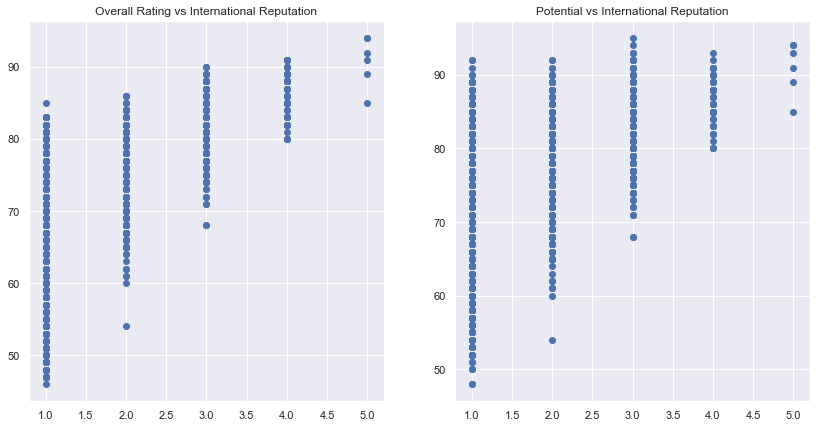

In [36]:
fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14,7))

ax1.scatter(df['International Reputation'],df['Overall'])
ax2.scatter(df['International Reputation'],df['Potential'])

ax1.set_title('Overall Rating vs International Reputation')
ax2.set_title('Potential vs International Reputation')

In [37]:
x=df.groupby('Club')['International Reputation'].mean().sort_values(ascending=False)[:20]

data=go.Bar(
    x=x.index,
    y=x.values,
    name='International Reputation Rating')



layout=go.Layout(
title='Clubs with most Reputed Players ',
xaxis=dict(title='Clubs'),
yaxis=dict(title='Reputation'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Age VS Value

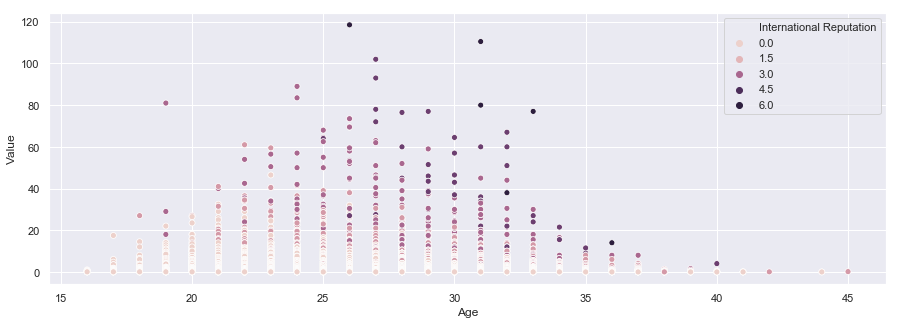

In [38]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['Age'],df['Value'],hue=df['International Reputation'])

In [39]:
df_temp=df[['Age','Value']]
df_temp['Age_cat']=df['Age']
for i in range(len(df_temp)):
    
    age=df_temp['Age'][i]
    if(age<20):
        df_temp['Age_cat'][i]='Below 20'
    elif((age>20)&(age<25)):
        df_temp['Age_cat'][i]='Between 20 And 25'
    elif((age>25)&(age<30)):
        df_temp['Age_cat'][i]='Between 25 And 30'
    elif((age>30)&(age<35)):
        df_temp['Age_cat'][i]='Between 30 And 35'
    else:
        df_temp['Age_cat'][i]='Above 35'


C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [40]:
data=go.Box(
    x=df_temp['Age_cat'],
    y=df_temp['Value'],
    name='Value')

layout=go.Layout(
title='Distribution of Player Value By Position',
xaxis=dict(title='Age'),
yaxis=dict(title='Value in Millions'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Player Rating vs Value

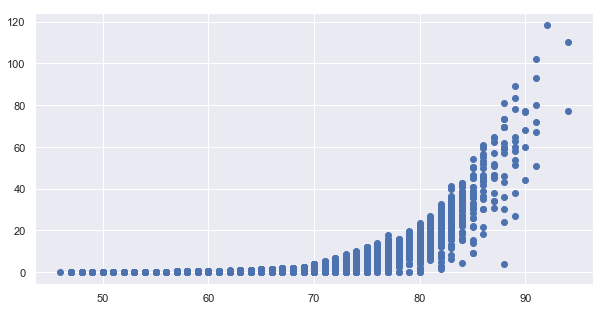

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(df['Overall'],df['Value'])

### Which Factors Relates Most with Player Rating

In [42]:
x=df.corrwith(df['Overall'])
x=x[x>0.5]
x[1:]

Potential         0.660939
Value             0.627085
Wage              0.571926
Special           0.606960
ShortPassing      0.502300
Reactions         0.811810
Composure         0.711350
Release Clause    0.589200
dtype: float64

### Distribution Of Player on basis on body type and their rating

In [43]:
x=df['Body Type'].value_counts()
x=x[x>1]
data=[go.Pie(
        labels=list(x.index),
        values=list(x.values))]

layout=go.Layout(
title='Body Type',
xaxis=dict(title='Foot'),
yaxis=dict(title='Count'),
hovermode='closest'
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [44]:
body_type=['Normal','Lean','Stocky']
df_temp=df[df['Body Type'].apply(lambda x:x in body_type)]
x=df_temp.groupby('Body Type')[['Overall','Potential']].mean()

trace0=go.Scatter(
    x=x.index,
    y=x['Overall'],
    mode='markers+lines',
    name='Average Overall Rating',
    marker=dict(size=14,color='rgb(0,100,0)',line=dict(width=2)))

trace1=go.Scatter(
    x=x.index,
    y=x['Potential'],
    mode='markers+lines',
    name='average Potential Rating',
    marker=dict(size=14,color='rgb(100,0,0)',line=dict(width=2)))

data=[trace0,trace1]

layout=go.Layout(
title='Work Rate vs Rating',
xaxis=dict(title='Work Rate'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [45]:
x=df['Position'].value_counts()
x=x[x>1]
data=[go.Pie(
        labels=list(x.index),
        values=list(x.values))]

layout=go.Layout(
title='Postion',
hovermode='closest'
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [46]:
x=df.groupby('Position')[['Overall','Potential']].mean().sort_values(by='Overall',ascending=False)

data1=go.Bar(
    x=x.index,
    y=x['Overall'],
    name='Overall Rating By Position')

data2=go.Bar(
    x=x.index,
    y=x['Potential'],
    name='Potential Rating By Position')



data=[data1,data2]

layout=go.Layout(
title='Average Rating by Position',
xaxis=dict(title='Position'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [47]:
x=df.groupby('Position')[['Height','Weight']].mean()

data1=go.Bar(
    x=x.index,
    y=x['Height'],
    name='Height in cm')

data2=go.Bar(
    x=x.index,
    y=x['Weight'],
    name='Weight in lbs')



data=[data1,data2]

layout=go.Layout(
title='Body Attributes of Players By Position',
xaxis=dict(title='Position'),
yaxis=dict(title='Value'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [48]:
data=go.Box(
    x=df['Position'],
    y=df['Value'])




layout=go.Layout(
title='Distribution of Player Value By Position',
xaxis=dict(title='Position'),
yaxis=dict(title='Value in Millions'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [49]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

### Best Player By Position

In [50]:
x=df.groupby('Position')['Overall'].max()
name=[]
rating=[]
for i in range(len(x)):
    y=x.values[i]
    w=x.index[i]
    record=df[(df
                  ['Overall']==y)&(df['Position']==w)]['Name'].tolist()[0]
    record=record+' ['+w+"]"
    name.append(record)
    rating.append(y)
    
data=[
    go.Scatter(
    x=name,
    y=rating,
    mode='markers+lines'
    )
]

layout=go.Layout(
title='Player with Best Rating By Position',
xaxis=dict(title='Player By Position'),
yaxis=dict(title='Rating'),
hovermode='closest'
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [51]:
x=df.groupby('Position')['Value'].max()
name=[]
rating=[]
for i in range(len(x)):
    y=x.values[i]
    w=x.index[i]
    record=df[(df
                  ['Value']==y)&(df['Position']==w)]['Name'].tolist()[0]
    record=record+' ['+w+"]"
    name.append(record)
    rating.append(y)
    
data=[
    go.Scatter(
    x=name,
    y=rating,
    mode='markers+lines'
    )
]

layout=go.Layout(
title='Most Expensive Player By Position',
xaxis=dict(title='Player By Position'),
yaxis=dict(title='Value in Million'),
hovermode='closest'
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

### Comparing Abilities of Players By Position 

In [52]:
attack=['RF', 'ST', 'LW','LF','RW','CF','RS','LS']
df_at=df[df['Position'].apply(lambda x:x in attack)]

mid=['RCM','LCM','LDM', 'CAM', 'CDM','RM', 'LAM', 'LM','RDM','CM','RAM']
df_mid=df[df['Position'].apply(lambda x:x in mid)]

defense=['RCB','CB','LCB','LB','RB','RB','RWB', 'LWB']
df_def=df[df['Position'].apply(lambda x:x in defense)]

In [53]:
df_temp=df
df_temp['Field Position']=df_temp['Position']

for i in range(len(df_temp)):
    
    x=df_temp['Position'][i]
    
    if(x in attack):
        
        df_temp['Field Position'][i]='Attack'
    
    elif(x in mid):
        df_temp['Field Position'][i]='Midfield'
        
    else:
        df_temp['Field Position'][i]='Defense'


C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
data=go.Box(
    x=df_temp['Field Position'],
    y=df_temp['Value'])




layout=go.Layout(
title='Distribution of Player Value By Position',
xaxis=dict(title='Position'),
yaxis=dict(title='Value in Millions'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

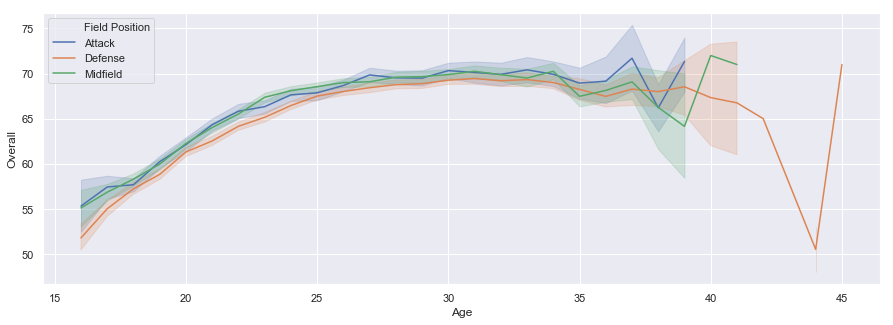

In [55]:
plt.figure(figsize=(15,5))
sns.lineplot(df_temp['Age'],df_temp['Overall'],hue=df_temp['Field Position'])

In [56]:
x=['Attack','Midfield','Defense']
y=[df_at['Overall'].mean(),df_mid['Overall'].mean(),df_def['Overall'].mean()]
y1=[df_at['Potential'].mean(),df_mid['Potential'].mean(),df_def['Potential'].mean()]


data0=go.Scatter(
    x=x,
    y=y,
    mode='markers+lines',
    name='Overall')


data1=go.Scatter(
    x=x,
    y=y1,
    mode='markers+lines',
    name='Potential')


data=[data1,data0]

layout=go.Layout(
title='Average Rating By Section',
xaxis=dict(title='Position'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Attacking Abilitites

In [57]:
x=['Attack','Midfield','Defense']
y=[df_at['Crossing'].mean(),df_mid['Crossing'].mean(),df_def['Crossing'].mean()]
y1=[df_at['Finishing'].mean(),df_mid['Finishing'].mean(),df_def['Finishing'].mean()]
y2=[df_at['HeadingAccuracy'].mean(),df_mid['HeadingAccuracy'].mean(),df_def['HeadingAccuracy'].mean()]
y3=[df_at['Volleys'].mean(),df_mid['Volleys'].mean(),df_def['Volleys'].mean()]
y4=[df_at['Dribbling'].mean(),df_mid['Dribbling'].mean(),df_def['Dribbling'].mean()]
y5=[df_at['Curve'].mean(),df_mid['Curve'].mean(),df_def['Curve'].mean()]

data0=go.Bar(
    x=x,
    y=y,
    name='Crossing')


data1=go.Bar(
    x=x,
    y=y1,
    name='Finishing')

data2=go.Bar(
    x=x,
    y=y3,
    name='Volleys')

data3=go.Bar(
    x=x,
    y=y4,
    name='Dribbling')

data4=go.Bar(
    x=x,
    y=y5,
    name='Curve')

data5=go.Bar(
    x=x,
    y=y2,
    name='HeadingAccuracy')


data=[data1,data0,data2,data3,data4,data5]

layout=go.Layout(
title='Abilitites By Section',
xaxis=dict(title='Position'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Midfield Abilitites

In [58]:
x=['Attack','Midfield','Defense']
y=[df_at['ShortPassing'].mean(),df_mid['ShortPassing'].mean(),df_def['ShortPassing'].mean()]
y1=[df_at['LongPassing'].mean(),df_mid['LongPassing'].mean(),df_def['LongPassing'].mean()]
y2=[df_at['Vision'].mean(),df_mid['Vision'].mean(),df_def['Vision'].mean()]

data0=go.Bar(
    x=x,
    y=y,
    name='ShortPassing')


data1=go.Bar(
    x=x,
    y=y1,
    name='LongPassing')

data2=go.Bar(
    x=x,
    y=y3,
    name='Vision')

data=[data1,data0,data2]

layout=go.Layout(
title='Abilitites By Section',
xaxis=dict(title='Position'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Defense Abilities 

In [59]:
x=['Attack','Midfield','Defense']
y=[df_at['Interceptions'].mean(),df_mid['Interceptions'].mean(),df_def['Interceptions'].mean()]
y1=[df_at['Marking'].mean(),df_mid['Marking'].mean(),df_def['Marking'].mean()]
y2=[df_at['StandingTackle'].mean(),df_mid['StandingTackle'].mean(),df_def['StandingTackle'].mean()]
y3=[df_at['SlidingTackle'].mean(),df_mid['SlidingTackle'].mean(),df_def['SlidingTackle'].mean()]
y4=[df_at['Composure'].mean(),df_mid['Composure'].mean(),df_def['Composure'].mean()]
y5=[df_at['Positioning'].mean(),df_mid['Positioning'].mean(),df_def['Positioning'].mean()]

data0=go.Bar(
    x=x,
    y=y,
    name='Interceptions')


data1=go.Bar(
    x=x,
    y=y1,
    name='Marking')

data2=go.Bar(
    x=x,
    y=y2,
    name='StandingTackle')

data3=go.Bar(
    x=x,
    y=y3,
    name='SlidingTackle')

data4=go.Bar(
    x=x,
    y=y4,
    name='Composure')

data5=go.Bar(
    x=x,
    y=y5,
    name='Positioning')


data=[data1,data0,data2,data3,data4,data5]

layout=go.Layout(
title='Abilitites By Section',
xaxis=dict(title='Position'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### General Player Abilities 

In [60]:
x=['Attack','Midfield','Defense']
y=[df_at['FKAccuracy'].mean(),df_mid['FKAccuracy'].mean(),df_def['FKAccuracy'].mean()]
y1=[df_at['SprintSpeed'].mean(),df_mid['SprintSpeed'].mean(),df_def['SprintSpeed'].mean()]
y2=[df_at['Acceleration'].mean(),df_mid['Acceleration'].mean(),df_def['Acceleration'].mean()]
y3=[df_at['Jumping'].mean(),df_mid['Jumping'].mean(),df_def['Jumping'].mean()]
y4=[df_at['Stamina'].mean(),df_mid['Stamina'].mean(),df_def['Stamina'].mean()]
y5=[df_at['Strength'].mean(),df_mid['Strength'].mean(),df_def['Strength'].mean()]
y6=[df_at['Penalties'].mean(),df_mid['Penalties'].mean(),df_def['Penalties'].mean()]


data0=go.Bar(
    x=x,
    y=y,
    name='FKAccuracy')


data1=go.Bar(
    x=x,
    y=y1,
    name='SprintSpeed')

data2=go.Bar(
    x=x,
    y=y2,
    name='Acceleration')

data3=go.Bar(
    x=x,
    y=y3,
    name='Jumping')

data4=go.Bar(
    x=x,
    y=y4,
    name='Stamina')

data5=go.Bar(
    x=x,
    y=y5,
    name='Strength')

data6=go.Bar(
    x=x,
    y=y6,
    name='Penalties')



data=[data1,data0,data2,data3,data4,data5,data6]

layout=go.Layout(
title='Abilitites By Section',
xaxis=dict(title='Position'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Players With Highest Release Clause

In [61]:
x=df.loc[:,['Name','Release Clause']].sort_values(by='Release Clause',ascending=False)[:20]
data=[
    go.Scatter(
    x=x['Name'],
    y=x['Release Clause'],
    mode='markers+lines'
    )
]

layout=go.Layout(
title='Players with Highest Release Clause',
xaxis=dict(title='Player'),
yaxis=dict(title='Value in Million'),
hovermode='closest'
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [62]:
x=['Attack','Midfield','Defense']
y=[df_at[df_at['Release Clause']>10]['Release Clause'].mean(),df_mid[df_mid['Release Clause']>10]['Release Clause'].mean(),
   df_def[df_def['Release Clause']>10]['Release Clause'].mean()]

data=go.Bar(
    x=x,
    y=y,
    name='Release Clause')

layout=go.Layout(
title='Average Release Clause By Position',
xaxis=dict(title='Position'),
yaxis=dict(title='Release Clause In Millions'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Best Attacking Players

In [63]:
df_at['Overall_Attacking']=(df_at['Finishing']+df_at['HeadingAccuracy']+df_at['Volleys']+df_at['Dribbling']+df_at['Curve']+
                            df_at['ShotPower']+df_at['LongShots']+df_at['Acceleration']+df_at['Agility']+df['Strength'])/10

x=df_at.loc[:,['Name','Overall_Attacking']].sort_values(by='Overall_Attacking',ascending=False)[:20]
data=go.Scatter(
    x=x['Name'],
    y=x['Overall_Attacking'],
    mode='markers+lines',
    name='Overall Attacking Rating')

layout=go.Layout(
title='Player with Best Attacking Ability',
xaxis=dict(title='Player'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Best Midfield Players

In [64]:
df_mid['Overall_Mid']=(df_mid['ShortPassing']+df_mid['LongPassing']+df_mid['BallControl']+df_mid['Dribbling']+df_mid['Vision']+
                        df_mid['Acceleration']+df_mid['Agility']+df_mid['Strength'])/8

x=df_mid.loc[:,['Name','Overall_Mid']].sort_values(by='Overall_Mid',ascending=False)[:20]
data=go.Scatter(
    x=x['Name'],
    y=x['Overall_Mid'],
    mode='markers+lines',
    name='Overall Attacking Rating')

layout=go.Layout(
title='Player with Best Attacking Ability',
xaxis=dict(title='Player'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Best Defensive Player

In [65]:
df_def['Overall_Def']=(df_def['Reactions']+df_def['Balance']+df_def['Strength']+df_def['Aggression']+df_def['Interceptions']+
                       df_def['Positioning']+df_def['Composure']+df_def['Marking']+df_def['StandingTackle']+
                       df_def['SlidingTackle']+df_def['Agility'])/12

x=df_def.loc[:,['Name','Overall_Def']].sort_values(by='Overall_Def',ascending=False)[:20]
data=go.Scatter(
    x=x['Name'],
    y=x['Overall_Def'],
    mode='markers+lines',
    name='Overall Defense Rating')

layout=go.Layout(
title='Player with Best Attacking Ability',
xaxis=dict(title='Player'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Player with Best GoalKeeper Ability

In [66]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [67]:
df_gk=df[df['Position']=='GK']
df_gk['Overall_keeping']=(df_gk['GKDiving']+df_gk['GKHandling']+df_gk['GKKicking']+df_gk['GKPositioning']+df_gk['GKReflexes'])/5

x=df_gk.loc[:,['Name','Overall_keeping']].sort_values(by='Overall_keeping',ascending=False)[:20]
data=go.Scatter(
    x=x['Name'],
    y=x['Overall_keeping'],
    mode='markers+lines',
    name='Overall Defense Rating')

layout=go.Layout(
title='Player with Best GoalKeeping Ability',
xaxis=dict(title='Player'),
yaxis=dict(title='Rating'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Club With Best Attack

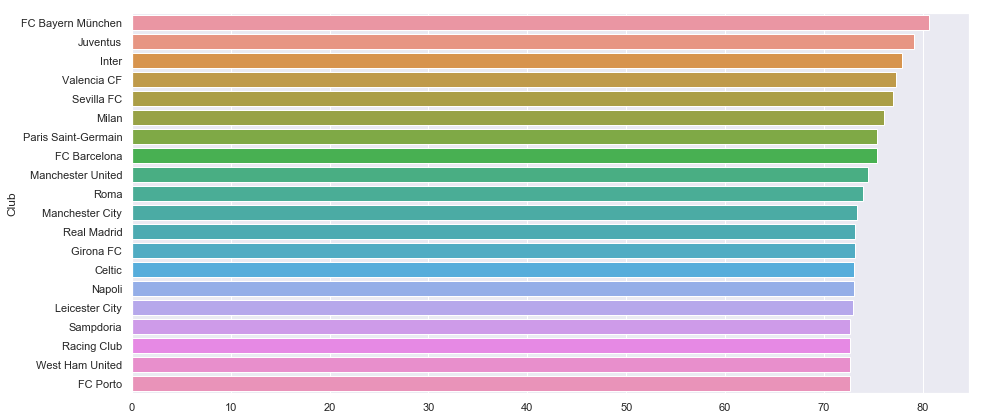

In [68]:
x=df_at.groupby('Club')['Overall_Attacking'].mean().sort_values(ascending=False)[:20]

plt.figure(figsize=(15,7))
sns.barplot(x.values,x.index)

### Club With Best Mid

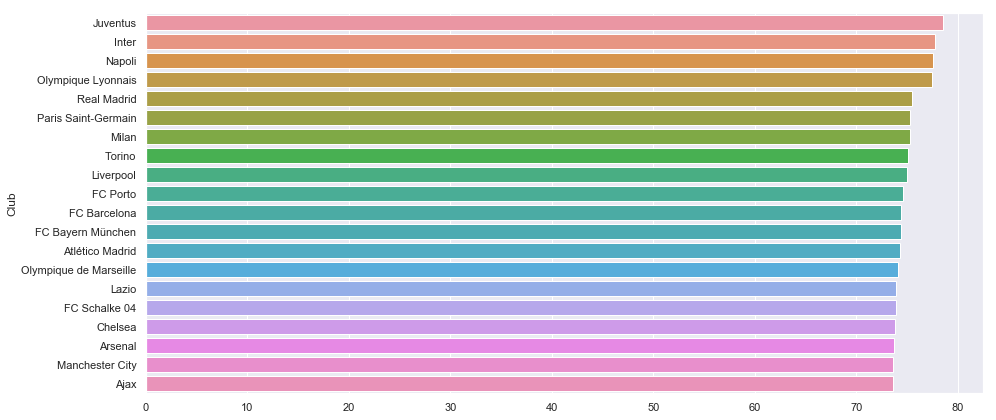

In [69]:
x=df_mid.groupby('Club')['Overall_Mid'].mean().sort_values(ascending=False)[:20]

plt.figure(figsize=(15,7))
sns.barplot(x.values,x.index)

### Club With Best Defense

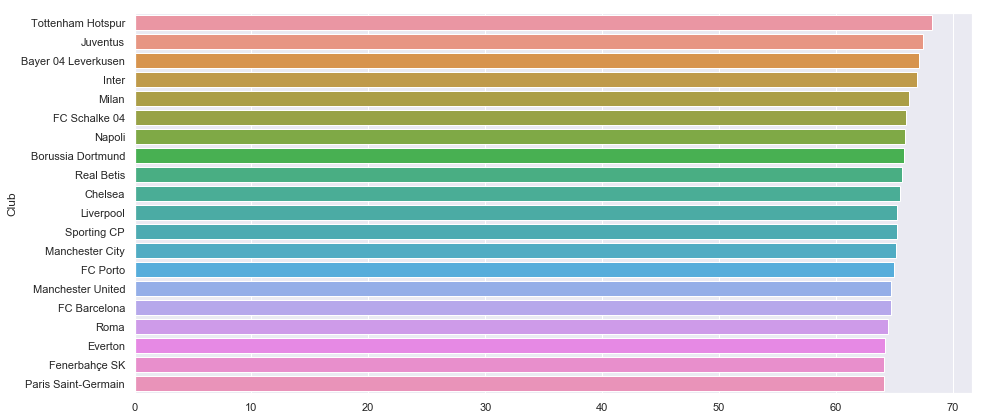

In [70]:
x=df_def.groupby('Club')['Overall_Def'].mean().sort_values(ascending=False)[:20]

plt.figure(figsize=(15,7))
sns.barplot(x.values,x.index)

### Best Player By each Attribute

In [71]:
cols=['Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 'LongPassing', 
     'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping', 'Stamina',
     'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 
     'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']

for col in cols:
    x=df[df[col]==df[col].max()]['Name'].tolist()[0]
    print(col,':',x)

Crossing : K. De Bruyne
Finishing : L. Messi
HeadingAccuracy : Naldo
ShortPassing : L. Modrić
Volleys : E. Cavani
Dribbling : L. Messi
Curve : Quaresma
FKAccuracy : L. Messi
LongPassing : T. Kroos
BallControl : L. Messi
Acceleration : Douglas Costa
SprintSpeed : K. Mbappé
Agility : Neymar Jr
Reactions : Cristiano Ronaldo
Balance : Bernard
ShotPower : Cristiano Ronaldo
Jumping : Cristiano Ronaldo
Stamina : N. Kanté
Strength : A. Akinfenwa
LongShots : L. Messi
Aggression : B. Pearson
Interceptions : N. Kanté
Positioning : Cristiano Ronaldo
Vision : L. Messi
Penalties : M. Balotelli
Composure : L. Messi
Marking : A. Barzagli
StandingTackle : G. Chiellini
SlidingTackle : Sergio Ramos
GKDiving : De Gea
GKHandling : J. Oblak
GKKicking : M. Neuer
GKPositioning : G. Buffon
GKReflexes : De Gea


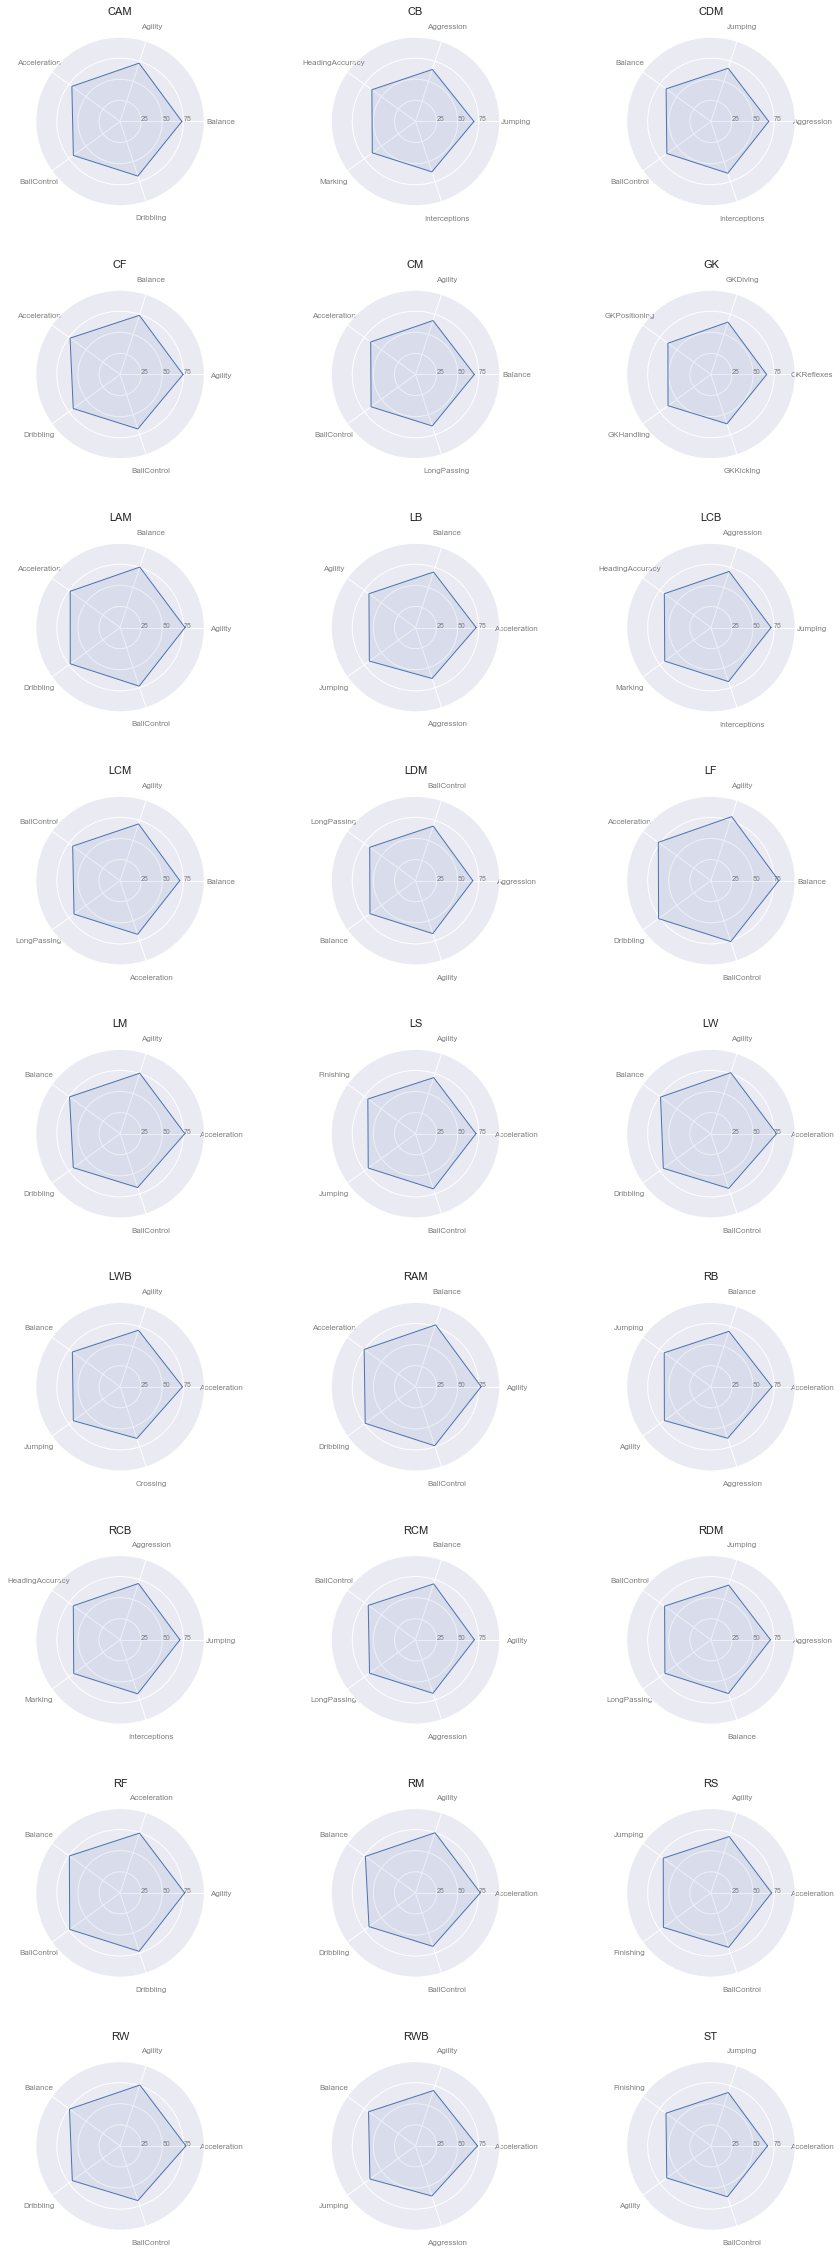

In [72]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    categories=top_features.keys()
    N = len(categories)

    values = list(top_features.values())
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(10, 3, idx, polar=True)

    
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

### How Age Affect Player Ability

Text(0.5,1,'Age vs GoalKeeper')

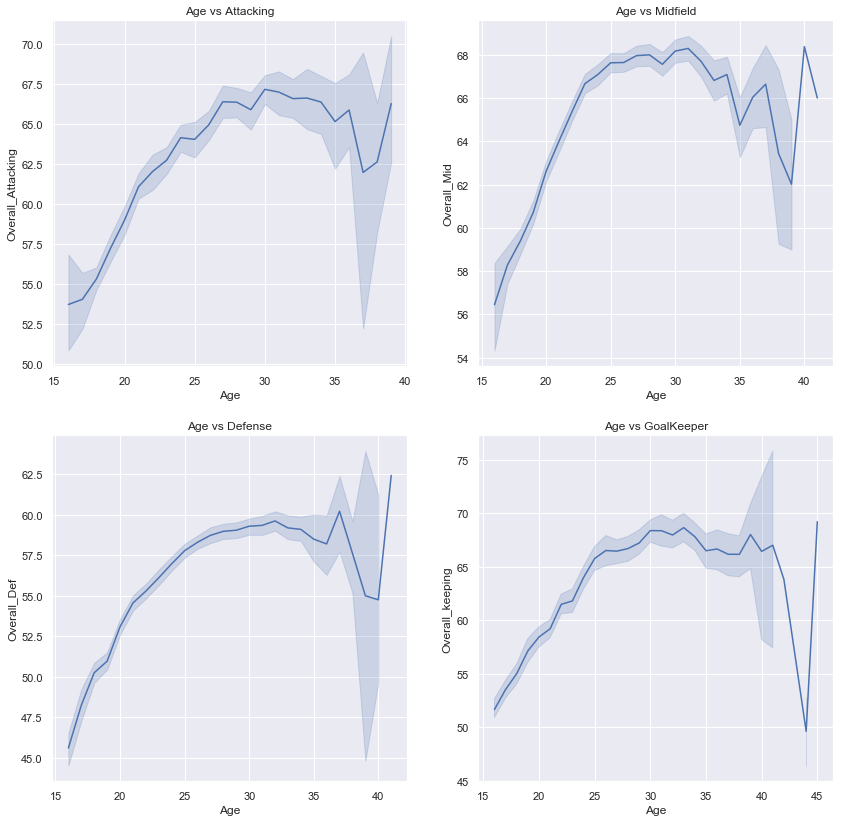

In [73]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(14,14))

sns.lineplot(df_at['Age'],df_at['Overall_Attacking'],ax=axes[0,0])
sns.lineplot(df_mid['Age'],df_mid['Overall_Mid'],ax=axes[0,1])
sns.lineplot(df_def['Age'],df_def['Overall_Def'],ax=axes[1,0])
sns.lineplot(df_gk['Age'],df_gk['Overall_keeping'],ax=axes[1,1])

axes[0,0].set_title('Age vs Attacking')
axes[0,1].set_title('Age vs Midfield')
axes[1,0].set_title('Age vs Defense')
axes[1,1].set_title('Age vs GoalKeeper')

### Distribution Of Player Age

(array([1.063e+03, 3.687e+03, 4.030e+03, 3.868e+03, 2.977e+03, 1.689e+03,
        7.270e+02, 1.440e+02, 1.900e+01, 3.000e+00]),
 array([16. , 18.9, 21.8, 24.7, 27.6, 30.5, 33.4, 36.3, 39.2, 42.1, 45. ]),
 <a list of 10 Patch objects>)

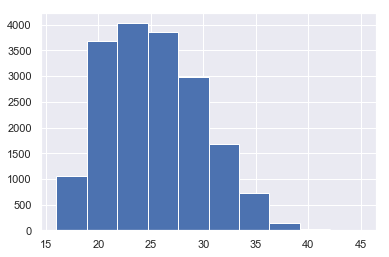

In [74]:
plt.hist(df['Age'])

### Club with most Loaned Players 

In [75]:
x=df['Loaned From'].value_counts()
x=x[1:11]

data=go.Bar(
    x=x.index,
    y=x.values,
    name='Club with most Loaned Players')

layout=go.Layout(
title='Club with most Loaned Players',
xaxis=dict(title='Club'),
yaxis=dict(title='Count'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Players BMI Check

In [76]:
df['BMI']=df['Weight']
df['BMI Stage']=df['Weight']

for i in range(len(df)):
    
    h=df['Height'][i]
    h=h/100
    
    w=df['Weight'][i]
    w=w/2.2046
    
    bmi=round(w / (h * h), 2)
    
    df['BMI'][i]=bmi
    
    if(bmi<18.5):
        df['BMI Stage'][i]='Underweight'
    elif((bmi>18.5) and (bmi<24.9)):
        df['BMI Stage'][i]='Normal Weight'
    else:
        df['BMI Stage'][i]='Overweight'

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData

In [77]:
x=df['BMI Stage'].value_counts()

data=go.Bar(
    x=x.index,
    y=x.values,
    name='BMI')

layout=go.Layout(
title='BMI',
xaxis=dict(title='Stage'),
yaxis=dict(title='Count'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### Contracts Expiring In Future Years

In [78]:
x=df['Contract Valid Until'].value_counts()
data=go.Bar(
    x=x.index,
    y=x.values,
    name='BMI')

layout=go.Layout(
title='Contracts Expiring By Years',
xaxis=dict(title='Year'),
yaxis=dict(title='Count'),
hovermode='closest'

)
figure=go.Figure(data=data,layout=layout)
iplot(figure)